In [1]:
# import numpy as np
import pandas as pd 
import tensorflow as tf 
from keras import layers
import keras

import cv2 as cv 
import matplotlib.pyplot as plt
import os
import datetime
import numpy as np

Using TensorFlow backend.


# 数据预处理

In [2]:
df=pd.read_csv('C:/Users/user/Desktop/Deeplearning/2015_2019vis.csv') 

In [3]:
df.head()

,siteid,sitename,vis,collect_time
0,58370,浦东,11800,2015/08/22 13:00
1,58370,浦东,28700,2015/08/22 14:00
2,58370,浦东,35000,2015/08/22 15:00
3,58370,浦东,35000,2015/08/22 16:00
4,58370,浦东,35000,2015/08/22 17:00


In [25]:
#张总给的数据时标签和照片分开的，所以要根据照片的名称(时间)来找它的标签
def data_preprocess_vis_pund(image_folder):
    images = []
    labels_vis = []
    date = []
    listd = os.listdir(image_folder) #列出文件夹下所有的目录与文件
    for i in range(0,len(listd)):
        path = os.path.join(image_folder,listd[i])
        
        daytime=listd[i][5:9]+'/'+listd[i][9:11]+'/'+listd[i][11:13]+' '+listd[i][13:15]+':'+'00'
        
        if df[df['collect_time'].str.match(daytime)]['vis'].size==0:
            continue
        vis=df[df['collect_time'].str.match(daytime)]['vis'].values[0]
        if np.isnan(vis)==True:
            continue      
        labels_vis.append(vis)
        img=cv.imread(path)
        images.append(img[50:345,:,:])
        date.append(daytime)
        if i%100 == 0:
            print(i)
    #test_images=np.array(images)[5500:,:,:,:]
    #test_date=np.array(date)[5500:]
    #test_labels=np.array(labels10)[5500:]
    #labels=np.array(labels10)[:5500]
    #images = create_more_data(np.array(images)[:5500,:,:,:])
    #labels_train = np.concatenate((labels,labels,labels,labels))
    #date_train=np.array(date)[:5500]
    #date_train = np.concatenate((date_train,date_train,date_train,date_train))
    return np.array(images),np.array(labels_vis),np.array(date)

In [34]:
#张总后来又给了部分数据格式和前面有点不同，所以又写了个对应照片与标签的函数，和前面那个差不多
def data_preprocess_vis_new(image_folder):
    images = []
    labels_vis = []
    date = []
    listd = os.listdir(image_folder) #列出文件夹下所有的目录与文件
    for i in range(0,len(listd)):
        path = os.path.join(image_folder,listd[i])
        
        daytime=listd[i][0:4]+'/'+listd[i][4:6]+'/'+listd[i][6:8]+' '+listd[i][8:10]+':'+'00'
        
        if df[df['collect_time'].str.match(daytime)]['vis'].size==0:
            continue
        vis=df[df['collect_time'].str.match(daytime)]['vis'].values[0]
        if np.isnan(vis)==True:
            continue      
        labels_vis.append(vis)
        img=cv.imread(path)
        images.append(img[50:345,:,:])
        date.append(daytime)
        if i%1000 == 0:
            print(i)
    #test_images=np.array(images)[5500:,:,:,:]
    #test_date=np.array(date)[5500:]
    #test_labels=np.array(labels10)[5500:]
    #labels=np.array(labels10)[:5500]
    #images = create_more_data(np.array(images)[:5500,:,:,:])
    #labels_train = np.concatenate((labels,labels,labels,labels))
    #date_train=np.array(date)[:5500]
    #date_train = np.concatenate((date_train,date_train,date_train,date_train))
    return np.array(images),np.array(labels_vis),np.array(date)

In [6]:
#数据增强
def create_more_data(images):
    image_rot180 = []
    img_lr = []
    img_ud = []
    for i in range(0,images.shape[0]):
        band_1 = images[i,:,:,0]
        band_2 = images[i,:,:,1]
        band_3 = images[i,:,:,2]
        
        band_1_rot180 = np.rot90(np.rot90(band_1))
        band_2_rot180 = np.rot90(np.rot90(band_2))
        band_3_rot180 = np.rot90(np.rot90(band_3))
        image_rot180.append(np.dstack((band_1_rot180,band_2_rot180,band_3_rot180)))
        
        lr1 = np.flip(band_1,0)
        lr2 = np.flip(band_2,0)
        lr3 = np.flip(band_3,0)
        img_lr.append(np.dstack((lr1,lr2,lr3)))
        
        ud1 = np.flip(band_1,1)
        ud2 = np.flip(band_2,1)
        ud3 = np.flip(band_3,1) 
        img_ud.append(np.dstack((ud1,ud2,ud3)))
    
    rot180 = np.array(image_rot180)
    lr = np.array(img_lr)
    ud = np.array(img_ud)
    images = np.concatenate((images,rot180,lr,ud))
    
    return images

In [4]:
#分割训练测试集 把训练集数据增强
def create_train_test_aug(images,labels,date):
    test_images=np.array(images)[-500:,:,:,:]
    test_date=np.array(date)[-500:]
    test_labels=np.array(labels)[-500:]
    labels=np.array(labels)[:-500]
    images = create_more_data(np.array(images)[:-500,:,:,:])
    labels_train = np.concatenate((labels,labels,labels,labels))
    date_train=np.array(date)[:-500]
    date_train = np.concatenate((date_train,date_train,date_train,date_train))
    return np.array(images),np.array(test_images),np.array(labels_train),np.array(test_labels),np.array(date_train),np.array(test_date)

In [26]:
img,label,date=data_preprocess_vis_pund("pund")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000


In [35]:
img_new,label_new,date_new=data_preprocess_vis_new("2019new")

0
1000


In [37]:
img_vis=np.concatenate((img,img_new))#合并新旧图像数据

In [45]:
label_vis.shape #所有数据的数量

(7442,)

In [39]:
label_vis=np.concatenate((label,label_new))#合并新旧标签数据

In [42]:
date_vis=np.concatenate((date,date_new))#合并新旧日期数据

In [46]:
np.savez("C:/Users/user/Desktop/Deeplearning/img_vis.npz",img_vis)
np.savez("C:/Users/user/Desktop/Deeplearning/label_vis.npz",label_vis)
np.savez("C:/Users/user/Desktop/Deeplearning/date_vis.npz",date_vis)

In [2]:
img_vis=np.load("C:/Users/user/Desktop/Deeplearning/img_vis.npz")["arr_0"]
label_vis=np.load("C:/Users/user/Desktop/Deeplearning/label_vis.npz")["arr_0"]
date_vis=np.load("C:/Users/user/Desktop/Deeplearning/date_vis.npz")["arr_0"]

In [7]:
imgvis_train,imgvis_test,labelvis_train,labelvis_test,datevis_train,datevis_test=create_train_test_aug(img_vis,label_vis,date_vis)

In [8]:
np.savez("C:/Users/user/Desktop/Deeplearning/imgvis_train.npz",imgvis_train)
np.savez("C:/Users/user/Desktop/Deeplearning/imgvis_test.npz",imgvis_test)
np.savez("C:/Users/user/Desktop/Deeplearning/labelvis_train.npz",labelvis_train)
np.savez("C:/Users/user/Desktop/Deeplearning/labelvis_test.npz",labelvis_test)
np.savez("C:/Users/user/Desktop/Deeplearning/datevis_train.npz",datevis_train)
np.savez("C:/Users/user/Desktop/Deeplearning/datevis_test.npz",datevis_test)

In [2]:
imgvis_train=np.load("visual_data/imgvis_train.npz")["arr_0"]
labelvis_train=np.load("visual_data/labelvis_train.npz")["arr_0"]

In [3]:
datevis_train=np.load("visual_data/datevis_train.npz")["arr_0"]

In [6]:
labelvis_test=np.load("C:/Users/user/Desktop/look/labelvis_test.npz")["arr_0"]
imgvis_test=np.load("C:/Users/user/Desktop/look/imgvis_test.npz")["arr_0"]

# Resnet50卷积网络

In [2]:
from keras.layers import merge,Conv2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.layers import Input
from keras.preprocessing.image import load_img, img_to_array
import keras.backend as K
def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    """
    conv_block is the block that has a conv layer at shortcut
    params:
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the nb_filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    Note that from stage 3, the first conv layer at main path is with subsample=(2,2)
    And the shortcut should has subsample=(2,2) as well
    """
    nb_filter1, nb_filter2, nb_filter3 = filters
    dim_ordering = K.image_dim_ordering()
    if dim_ordering == 'tf':
        axis = 3
    else:
        axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    out = Convolution2D(nb_filter1, 1, 1, subsample=strides,
                        dim_ordering=dim_ordering, name=conv_name_base + '2a')(input_tensor)
    out = BatchNormalization(axis=axis, name=bn_name_base + '2a')(out)
    out = Activation('relu')(out)

    out = Convolution2D(nb_filter2, kernel_size, kernel_size, border_mode='same',
                        dim_ordering=dim_ordering, name=conv_name_base + '2b')(out)
    out = BatchNormalization(axis=axis, name=bn_name_base + '2b')(out)
    out = Activation('relu')(out)

    out = Convolution2D(nb_filter3, 1, 1, dim_ordering=dim_ordering, name=conv_name_base + '2c')(out)
    out = BatchNormalization(axis=axis, name=bn_name_base + '2c')(out)

    shortcut = Convolution2D(nb_filter3, 1, 1, subsample=strides,
                             dim_ordering=dim_ordering, name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(axis=axis, name=bn_name_base + '1')(shortcut)

    out = merge([out, shortcut], mode='sum')
    out = Activation('relu')(out)
    return out

def identity_block(input_tensor, kernel_size, filters, stage, block):
    """
    the identity_block is the block that has no conv layer at shortcut
    params:
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the nb_filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    """
    dim_ordering = K.image_dim_ordering()
    nb_filter1, nb_filter2, nb_filter3 = filters
    if dim_ordering == 'tf':
        axis = 3
    else:
        axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    out = Convolution2D(nb_filter1, 1, 1, dim_ordering=dim_ordering, name=conv_name_base + '2a')(input_tensor)
    out = BatchNormalization(axis=axis, name=bn_name_base + '2a')(out)
    out = Activation('relu')(out)

    out = out = Convolution2D(nb_filter2, kernel_size, kernel_size, border_mode='same',
                              dim_ordering=dim_ordering, name=conv_name_base + '2b')(out)
    out = BatchNormalization(axis=axis, name=bn_name_base + '2b')(out)
    out = Activation('relu')(out)

    out = Convolution2D(nb_filter3, 1, 1, dim_ordering=dim_ordering, name=conv_name_base + '2c')(out)
    out = BatchNormalization(axis=axis, name=bn_name_base + '2c')(out)

    out = merge([out, input_tensor], mode='sum')
    out = Activation('relu')(out)
    return out
def get_resnet50():
    """
    this function returns the 50-layer residual network model
    you should load pretrained weights if you want to use it directly.
    Note that since the pretrained weights is converted from caffemodel
    the order of channels for input image should be 'BGR' (the channel order of caffe)
    """
    if K.image_dim_ordering() == 'tf':
        inp = Input(shape=(295,584, 3))
        axis = 3
    else:
        inp = Input(shape=(3, 295,584))
        axis = 1

    dim_ordering = K.image_dim_ordering()
    out = ZeroPadding2D((3, 3), dim_ordering=dim_ordering)(inp)
    out = Convolution2D(64, 7, 7, subsample=(2, 2), dim_ordering=dim_ordering, name='conv1')(out)
    out = BatchNormalization(axis=axis, name='bn_conv1')(out)
    out = Activation('relu')(out)
    out = MaxPooling2D((3, 3), strides=(2, 2), dim_ordering=dim_ordering)(out)

    out = conv_block(out, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    out = identity_block(out, 3, [64, 64, 256], stage=2, block='b')
    out = identity_block(out, 3, [64, 64, 256], stage=2, block='c')

    out = conv_block(out, 3, [128, 128, 512], stage=3, block='a')
    out = identity_block(out, 3, [128, 128, 512], stage=3, block='b')
    out = identity_block(out, 3, [128, 128, 512], stage=3, block='c')
    out = identity_block(out, 3, [128, 128, 512], stage=3, block='d')

    out = conv_block(out, 3, [256, 256, 1024], stage=4, block='a')
    out = identity_block(out, 3, [256, 256, 1024], stage=4, block='b')
    out = identity_block(out, 3, [256, 256, 1024], stage=4, block='c')
    out = identity_block(out, 3, [256, 256, 1024], stage=4, block='d')
    out = identity_block(out, 3, [256, 256, 1024], stage=4, block='e')
    out = identity_block(out, 3, [256, 256, 1024], stage=4, block='f')

    out = conv_block(out, 3, [512, 512, 2048], stage=5, block='a')
    out = identity_block(out, 3, [512, 512, 2048], stage=5, block='b')
    out = identity_block(out, 3, [512, 512, 2048], stage=5, block='c')

    out = AveragePooling2D((7, 7), dim_ordering=dim_ordering)(out)
    out = Flatten()(out)
    out = Dense(500, name ='yield')(out)
    out = Dense(1, name = 'fc1')(out)
    

    
    model = Model(inp, out)
    model.compile(loss='mse',optimizer=tf.train.AdamOptimizer(0.0001),metrics=['mae'])
    model.summary()

    return model

In [3]:
resnet50=get_resnet50()

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:100: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((3, 3), data_format="channels_last")`
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (7, 7), strides=(2, 2), name="conv1", data_format="channels_last")`
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:104: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((3, 3), data_format="channels_last", strides=(2, 2))`
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), strides=(1, 1), name="res2a_branch2a", data_format="channels_last")`
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:36: UserWarning: Update you

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:70: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 1), data_format="channels_last", name="res4d_branch2a")`
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same", name="res4d_branch2b", data_format="channels_last")`
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:79: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (1, 1), data_format="channels_last", name="res4d_branch2c")`
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:70: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 1), data_format="channels_last", name="res4e_branch2a")`
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:75: UserWarning: Upd

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 295, 584, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 301, 590, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 148, 292, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 148, 292, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:126: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D((7, 7), data_format="channels_last")`


In [ ]:
import numpy as np
train = np.load('sgs/data/img_train.npz')

In [9]:
H=resnet50.fit(imgvis_train,labelvis_train,batch_size=15,epochs=40,verbose=1,validation_split=0.2)
resnet50.save('Vis_resnet_aug_del_class_10_19.h5')

Train on 22214 samples, validate on 5554 samples
Epoch 1/40
22214/22214 [==============================] - 1135s 51ms/step - loss: 46682427.6429 - mean_absolute_error: 4892.0181 - val_loss: 84874335.1075 - val_mean_absolute_error: 7120.7091
Epoch 2/40
22214/22214 [==============================] - 1104s 50ms/step - loss: 21604448.9433 - mean_absolute_error: 3448.0248 - val_loss: 26526994.8069 - val_mean_absolute_error: 3878.1412
Epoch 3/40
22214/22214 [==============================] - 1105s 50ms/step - loss: 16911933.1464 - mean_absolute_error: 3035.7331 - val_loss: 24999831.1012 - val_mean_absolute_error: 3832.0432
Epoch 4/40
22214/22214 [==============================] - 1105s 50ms/step - loss: 14365832.0651 - mean_absolute_error: 2792.6669 - val_loss: 44616840.2374 - val_mean_absolute_error: 5032.3738
Epoch 5/40
22214/22214 [==============================] - 1103s 50ms/step - loss: 12149911.7576 - mean_absolute_error: 2559.5630 - val_loss: 26520368.3512 - val_mean_absolute_error: 3

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:121: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.style.use("ggplot")
plt.figure()
N = 40

plt.plot(np.arange(0, N), H.history["mean_absolute_error"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_mean_absolute_error"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.show()

NameError: name 'H' is not defined

In [8]:
pred_test=resnet50.predict(imgvis_test,verbose=1)

500/500 [==============================] - 9s 19ms/step


In [28]:
round_pred=round_pred.astype(np.int16)
round_pred

array([[ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],

In [17]:
np.count_nonzero(round_pred==2)

4

In [18]:
labelvis_class_test=np.zeros(labelvis_test.shape)
labelvis_class_test[labelvis_test<5000]=1
labelvis_class_test[labelvis_test<3000]=2
labelvis_class_test[labelvis_test<1000]=3
labelvis_class_test[labelvis_test<500]=4

In [31]:
np.count_nonzero(round_pred==0)

387

In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
mat = confusion_matrix(labelvis_class_test, round_pred)
print(type(labelvis_class_test),type(round_pred))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)#,
            #xticklabels=['0','1','2','3','4','5'],
            #yticklabels=['0','1','2','3','4','5'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

NameError: name 'labelvis_class_test' is not defined

In [33]:
(366+25+4)/(11+366+63+14+25+21)

0.79

In [2]:
from keras.models import load_model
model=load_model('Vis_resnet_aug.h5')

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\topology.py:1253: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
imgvis_test=np.load("visual_data/imgvis_test.npz")["arr_0"]
labelvis_test=np.load("visual_data/labelvis_test.npz")["arr_0"]

In [16]:
labelvis_class_train=np.zeros(labelvis_train.shape)
labelvis_class_train[labelvis_train<5000]=1
labelvis_class_train[labelvis_train<3000]=2
labelvis_class_train[labelvis_train<1000]=3
labelvis_class_train[labelvis_train<500]=4

In [61]:
a=np.where(labelvis_class_train==0)

In [64]:
array_a=np.array(a)

In [72]:
import random
list_a=list(array_a)
dele_index=random.sample(list_a, 18380 if len(list_a) > 18380 else len(list_a))

In [74]:
dele_index

[692,
 12675,
 13165,
 5553,
 20145,
 6828,
 26610,
 12640,
 26552,
 21592,
 18608,
 8494,
 17892,
 26743,
 17293,
 14431,
 6790,
 6401,
 22981,
 3271,
 20779,
 27065,
 2191,
 3019,
 10544,
 24654,
 12340,
 19922,
 26706,
 23940,
 22381,
 22847,
 19622,
 23501,
 26798,
 23559,
 12873,
 16066,
 18288,
 23570,
 9558,
 12271,
 938,
 6680,
 9549,
 27328,
 8214,
 4838,
 10978,
 3590,
 17476,
 4539,
 23826,
 15450,
 10794,
 12558,
 600,
 15967,
 23931,
 2326,
 8971,
 27400,
 1580,
 10564,
 23902,
 27230,
 2947,
 6220,
 25642,
 22726,
 1551,
 22680,
 6635,
 16128,
 26157,
 10250,
 19633,
 22154,
 14527,
 2986,
 9221,
 21398,
 13242,
 9469,
 1184,
 6026,
 9135,
 4468,
 17981,
 15950,
 21712,
 5896,
 4060,
 11683,
 2154,
 22075,
 10016,
 10292,
 21708,
 8932,
 18399,
 5698,
 6041,
 17675,
 7643,
 21296,
 24124,
 6545,
 1121,
 21764,
 19145,
 3299,
 23461,
 26875,
 18316,
 7741,
 9228,
 14946,
 25786,
 15233,
 22962,
 1950,
 11980,
 7933,
 8337,
 8483,
 2175,
 19901,
 9984,
 21575,
 13061,
 1428

In [82]:
index

array([    0,    14,    21, ..., 27765, 27766, 27767])

In [77]:
index_2=np.arange(labelvis_class_train.shape[0])
index=np.delete(index_2,dele_index)

In [87]:
imgvis_train_del.shape

(9388, 295, 584, 3)

In [85]:
imgvis_train_del=imgvis_train[index,:,:,:]
labelvis_train_del=labelvis_train[index]
labelvis_class_train_del=labelvis_class_train[index]

In [88]:
np.savez("visual_data/imgvis_train_del.npz",imgvis_train_del)
np.savez("visual_data/labelvis_train_del.npz",labelvis_train_del)
np.savez("visual_data/labelvis_class_train_del.npz",labelvis_class_train_del)

In [2]:
imgvis_train_del=np.load("visual_data/imgvis_train_del.npz")["arr_0"]
labelvis_train_del=np.load("visual_data/labelvis_train_del.npz")["arr_0"]
labelvis_class_train_del=np.load("visual_data/labelvis_class_train_del.npz")["arr_0"]

In [21]:
pred_train=model.predict(imgvis_train,verbose=1)

27768/27768 [==============================] - 441s 16ms/step


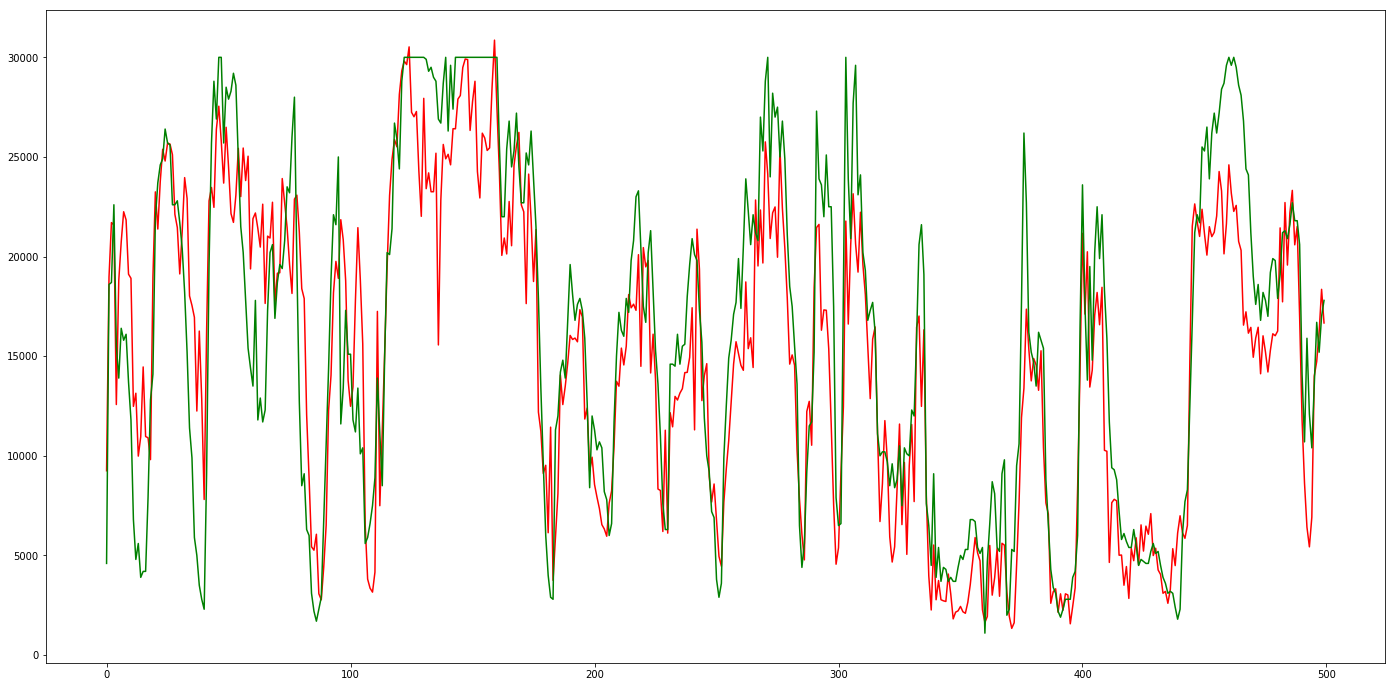

In [7]:
plt.figure(figsize=(24, 12))
plt.plot([i for i in range(500)],pred,c='r')
plt.plot([i for i in range(500)],labelvis_test,c='g')
plt.show()

In [9]:
np.mean(np.abs(pred.squeeze()-labelvis_test.squeeze()))

3241.056515625

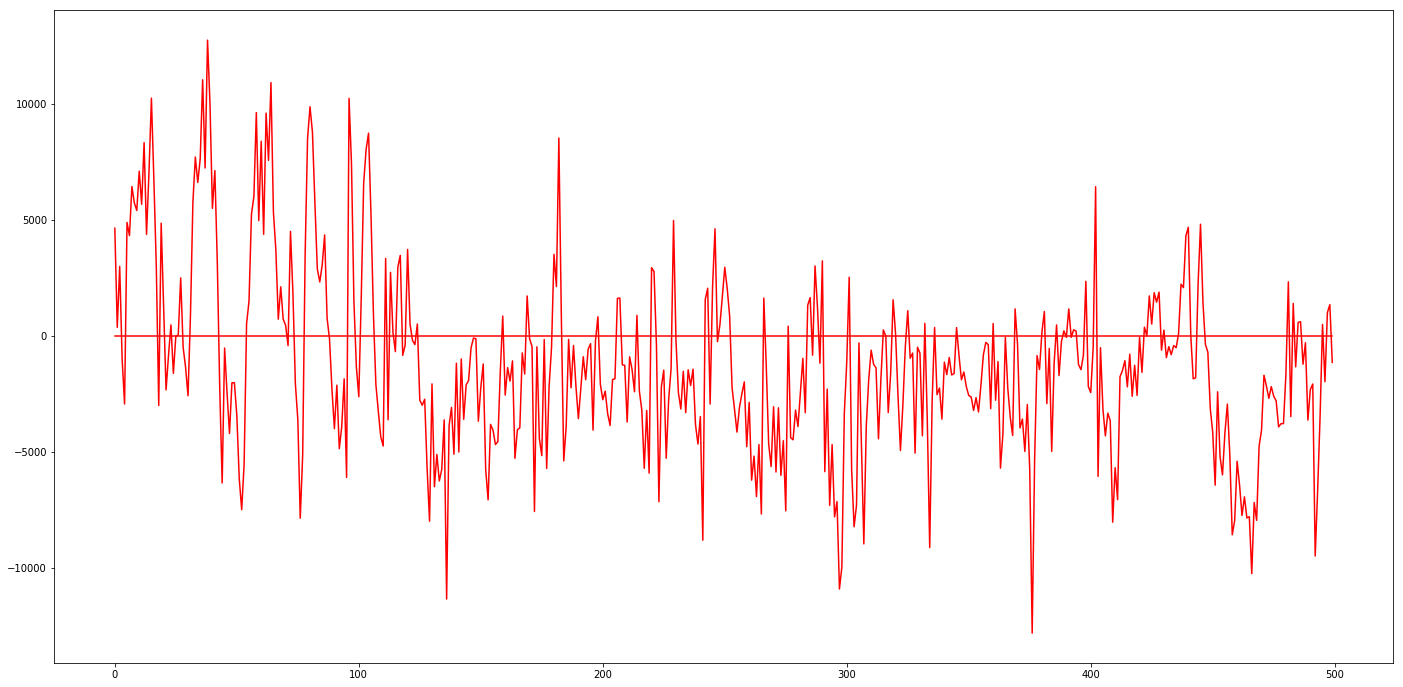

In [8]:
plt.figure(figsize=(24, 12))
#plt.ylim(np.min(mae),np.max(mae)) 
plt.plot([i for i in range(500)],pred.squeeze()-labelvis_test.squeeze(),c='r')
plt.plot([i for i in range(500)],np.zeros(500),c='r')
plt.show()

In [22]:
ind=labelvis_train<1000

In [24]:
pred_train=pred_train.squeeze()
labelvis_train=labelvis_train.squeeze()

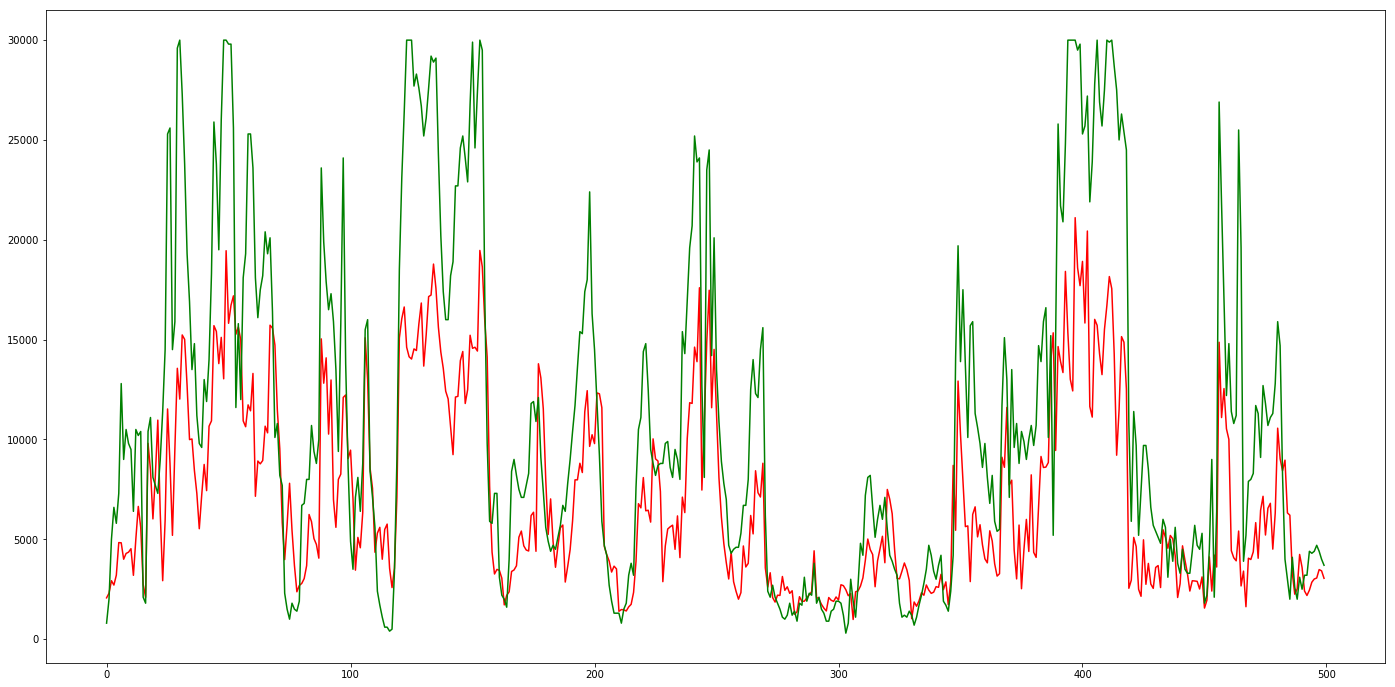

In [28]:
plt.figure(figsize=(24, 12))
plt.plot([i for i in range(500)],pred_train[-500:],c='r')
plt.plot([i for i in range(500)],labelvis_train[-500:],c='g')
plt.show()

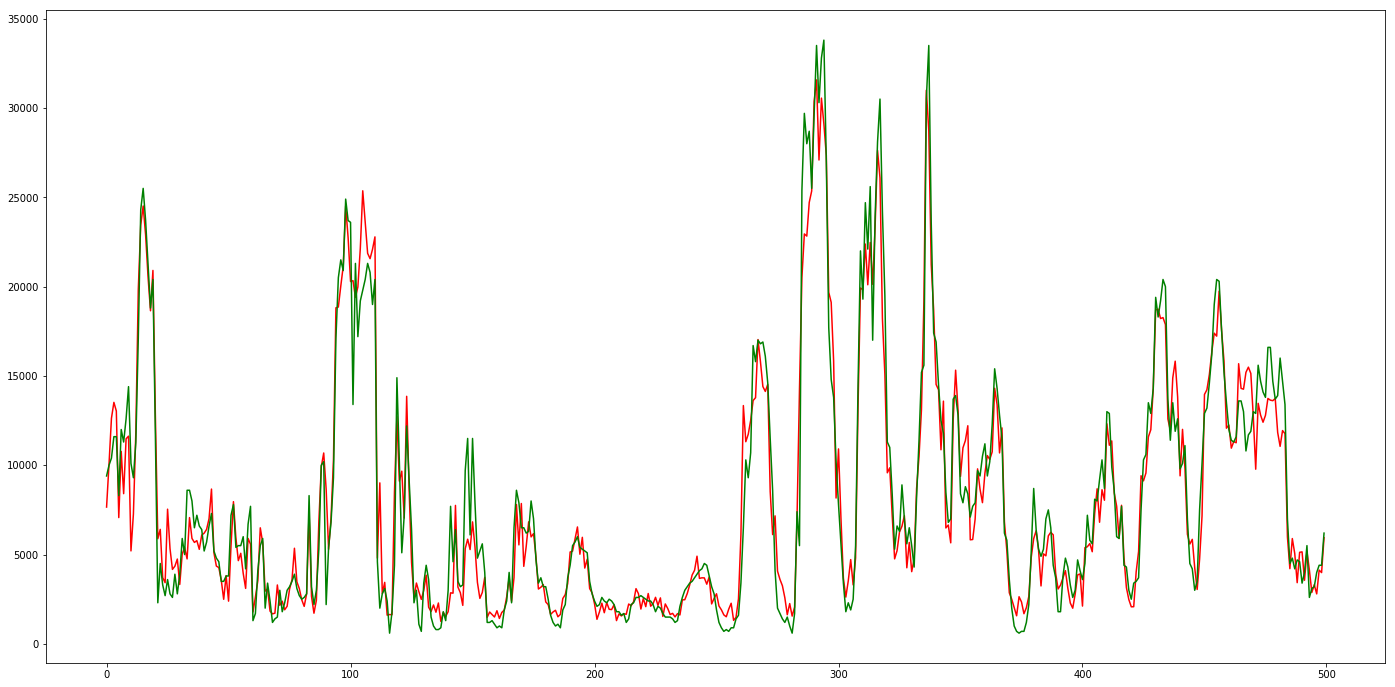

In [29]:
plt.figure(figsize=(24, 12))
plt.plot([i for i in range(500)],pred_train[:500],c='r')
plt.plot([i for i in range(500)],labelvis_train[:500],c='g')
plt.show()

In [31]:
time=[]
for i in range(0,datevis_train.size):
    time.append(datevis_train[i][11:13])

In [32]:
time

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',

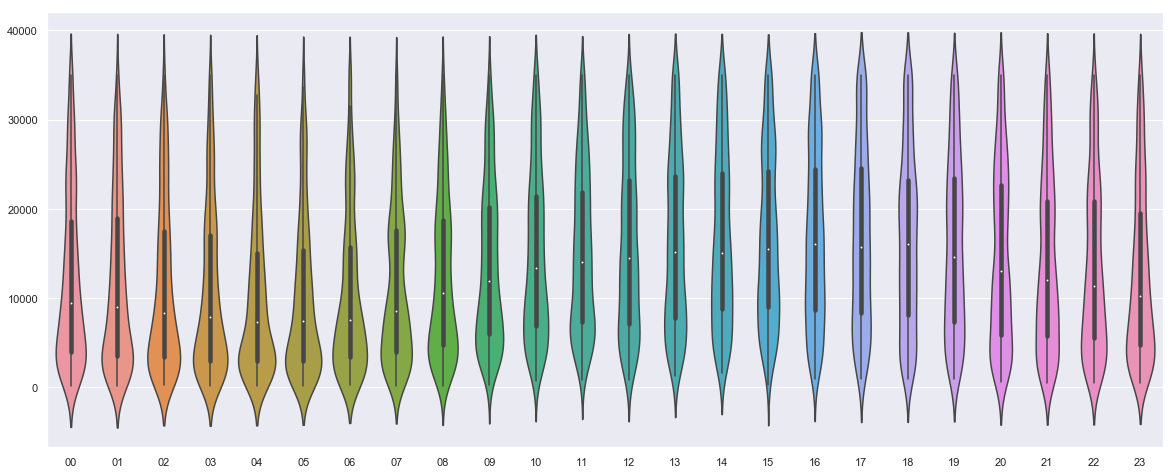

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
#sns.set_context('talk')
plt.style.use({'figure.figsize':(20, 8)})
sns.violinplot(x=time,y=labelvis_train )

In [3]:
from keras.layers import Input
from keras.layers.merge import concatenate, add
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.utils import plot_model

RESNET_V1_A_COUNT = 0
RESNET_V1_B_COUNT = 0
RESNET_V1_C_COUNT = 0

def resnet_v1_stem(x_input):
    with K.name_scope('Stem'):
        x = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='valid')(x_input)
        x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid')(x)
        x = Conv2D(80, (1, 1), activation='relu', padding='same')(x)
        x = Conv2D(192, (3, 3), activation='relu', padding='valid')(x)
        x = Conv2D(256, (3, 3), strides=(2, 2), activation='relu', padding='valid')(x)
        x = BatchNormalization(axis=-1)(x)
        x = Activation('relu')(x)
    return x

def inception_resnet_v1_A(x_input, scale_residual=True):
    """ 35x35 卷积核"""
    global RESNET_V1_A_COUNT
    RESNET_V1_A_COUNT += 1
    with K.name_scope('resnet_v1_A' + str(RESNET_V1_A_COUNT)):
        ar1 = Conv2D(32, (1, 1), activation='relu', padding='same')(x_input)
 
        ar2 = Conv2D(32, (1, 1), activation='relu', padding='same')(x_input)
        ar2 = Conv2D(32, (3, 3), activation='relu', padding='same')(ar2)
 
        ar3 = Conv2D(32, (1, 1), activation='relu', padding='same')(x_input)
        ar3 = Conv2D(32, (3, 3), activation='relu', padding='same')(ar3)
        ar3 = Conv2D(32, (3, 3), activation='relu', padding='same')(ar3)
 
        merged_vector = concatenate([ar1, ar2, ar3], axis=-1)
 
        ar = Conv2D(256, (1, 1), activation='linear', padding='same')(merged_vector)
 
        if scale_residual:  # 是否缩小
            ar = Lambda(lambda x: 0.1*x)(ar)
        x = add([x_input, ar])
        x = BatchNormalization(axis=-1)(x)
        x = Activation('relu')(x)
    return x

def inception_resnet_v1_B(x_input, scale_residual=True):
    """ 17x17 卷积核"""
    global RESNET_V1_B_COUNT
    RESNET_V1_B_COUNT += 1
    with K.name_scope('resnet_v1_B' + str(RESNET_V1_B_COUNT)):
        br1 = Conv2D(128, (1, 1), activation='relu', padding='same')(x_input)
 
        br2 = Conv2D(128, (1, 1), activation='relu', padding='same')(x_input)
        br2 = Conv2D(128, (1, 7), activation='relu', padding='same')(br2)
        br2 = Conv2D(128, (7, 1), activation='relu', padding='same')(br2)
 
        merged_vector = concatenate([br1, br2], axis=-1)
 
        br = Conv2D(896, (1, 1), activation='linear', padding='same')(merged_vector)
 
        if scale_residual:
            br = Lambda(lambda x: 0.1*x)(br)
        x = add([x_input, br])
        x = BatchNormalization(axis=-1)(x)
        x = Activation('relu')(x)
 
    return x
 
 
def inception_resnet_v1_C(x_input, scale_residual=True):
    global RESNET_V1_C_COUNT
    RESNET_V1_C_COUNT += 1
    with K.name_scope('resnet_v1_C' + str(RESNET_V1_C_COUNT)):
        cr1 = Conv2D(192, (1, 1), activation='relu', padding='same')(x_input)
 
        cr2 = Conv2D(192, (1, 1), activation='relu', padding='same')(x_input)
        cr2 = Conv2D(192, (1, 3), activation='relu', padding='same')(cr2)
        cr2 = Conv2D(192, (3, 1), activation='relu', padding='same')(cr2)
 
        merged_vector = concatenate([cr1, cr2], axis=-1)
 
        cr = Conv2D(1792, (1, 1), activation='relu', padding='same')(merged_vector)
 
        if scale_residual:
            cr = Lambda(lambda x: 0.1*x)
        x = add([x_input, cr])
        x = BatchNormalization(axis=-1)(x)
        x = Activation('relu')(x)
    return x
 
 
def reduction_resnet_A(x_input, k=192, l=224, m=256, n=384):
    with K.name_scope('reduction_resnet_A'):
        ra1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x_input)
 
        ra2 = Conv2D(n, (3, 3), activation='relu', strides=(2, 2), padding='valid')(x_input)
 
        ra3 = Conv2D(k, (1, 1), activation='relu', padding='same')(x_input)
        ra3 = Conv2D(l, (3, 3), activation='relu', padding='same')(ra3)
        ra3 = Conv2D(m, (3, 3), activation='relu', strides=(2, 2), padding='valid')(ra3)
 
        merged_vector = concatenate([ra1, ra2, ra3], axis=-1)
 
        x = BatchNormalization(axis=-1)(merged_vector)
        x = Activation('relu')(x)
    return x
 
 
def reduction_resnet_B(x_input):
    with K.name_scope('reduction_resnet_B'):
        rb1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2),padding='valid')(x_input)
 
        rb2 = Conv2D(256, (1, 1), activation='relu', padding='same')(x_input)
        rb2 = Conv2D(384, (3, 3), strides=(2, 2), activation='relu', padding='valid')(rb2)
 
        rb3 = Conv2D(256, (1, 1),activation='relu', padding='same')(x_input)
        rb3 = Conv2D(256, (3, 3), strides=(2, 2), activation='relu', padding='valid')(rb3)
 
        rb4 = Conv2D(256, (1, 1), activation='relu', padding='same')(x_input)
        rb4 = Conv2D(256, (3, 3), activation='relu', padding='same')(rb4)
        rb4 = Conv2D(256, (3, 3), strides=(2, 2), activation='relu', padding='valid')(rb4)
 
        merged_vector = concatenate([rb1, rb2, rb3, rb4], axis=-1)
 
        x = BatchNormalization(axis=-1)(merged_vector)
        x = Activation('relu')(x)
    return x
 
 
def inception_resnet_v1_backbone(nb_classes=1000, scale=True):
    x_input = Input(shape=(299, 299, 3))
    # stem
    x = resnet_v1_stem(x_input)
 
    # 5 x inception_resnet_v1_A
    for i in range(5):
        x = inception_resnet_v1_A(x, scale_residual=False)
 
    # reduction_resnet_A
    x = reduction_resnet_A(x, k=192, l=192, m=256, n=384)
 
    # 10 x inception_resnet_v1_B
    for i in range(10):
        x = inception_resnet_v1_B(x, scale_residual=True)
 
    # Reduction B
    x = reduction_resnet_B(x)
 
    # 5 x Inception C
    for i in range(5):
        x = inception_resnet_v1_C(x, scale_residual=True)
 
    # Average Pooling
    x = AveragePooling2D(pool_size=(8, 8))(x)
 
    # dropout
    x = Dropout(0.2)(x)
    x = Flatten()(x)
    x = Dense(units=nb_classes, activation='softmax')(x)
 
    return Model(inputs=x_input, outputs=x, name='Inception-Resnet-v1')

In [4]:
from keras.layers import Input, add
from keras.layers.merge import concatenate
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
#import reduction_resnet_A
from keras.utils import plot_model
import keras.backend as K
 
 
RESNET_V2_A_COUNT = 0
RESNET_V2_B_COUNT = 0
RESNET_V2_C_COUNT = 0
 
 
def resnet_v2_stem(x_input):
    '''The stem of the pure Inception-v4 and Inception-ResNet-v2 networks. This is input part of those networks.'''
 
    # Input shape is 299 * 299 * 3 (Tensorflow dimension ordering)
    with K.name_scope("stem"):
        x = Conv2D(32, (3, 3), activation="relu", strides=(2, 2))(x_input)  # 149 * 149 * 32
        x = Conv2D(32, (3, 3), activation="relu")(x)  # 147 * 147 * 32
        x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)  # 147 * 147 * 64
 
        x1 = MaxPooling2D((3, 3), strides=(2, 2))(x)
        x2 = Conv2D(96, (3, 3), activation="relu", strides=(2, 2))(x)
 
        x = concatenate([x1, x2], axis=-1)  # 73 * 73 * 160
 
        x1 = Conv2D(64, (1, 1), activation="relu", padding="same")(x)
        x1 = Conv2D(96, (3, 3), activation="relu")(x1)
 
        x2 = Conv2D(64, (1, 1), activation="relu", padding="same")(x)
        x2 = Conv2D(64, (7, 1), activation="relu", padding="same")(x2)
        x2 = Conv2D(64, (1, 7), activation="relu", padding="same")(x2)
        x2 = Conv2D(96, (3, 3), activation="relu", padding="valid")(x2)
 
        x = concatenate([x1, x2], axis=-1)  # 71 * 71 * 192
 
        x1 = Conv2D(192, (3, 3), activation="relu", strides=(2, 2))(x)
 
        x2 = MaxPooling2D((3, 3), strides=(2, 2))(x)
 
        x = concatenate([x1, x2], axis=-1)  # 35 * 35 * 384
 
        x = BatchNormalization(axis=-1)(x)
        x = Activation("relu")(x)
    return x
 
 
def inception_resnet_v2_A(x_input, scale_residual=True):
    '''Architecture of Inception_ResNet_A block which is a 35 * 35 grid module.'''
    global RESNET_V2_A_COUNT
    RESNET_V2_A_COUNT += 1
    with K.name_scope('inception_resnet_v2_A' + str(RESNET_V2_A_COUNT)):
        ar1 = Conv2D(32, (1, 1), activation="relu", padding="same")(x_input)
 
        ar2 = Conv2D(32, (1, 1), activation="relu", padding="same")(x_input)
        ar2 = Conv2D(32, (3, 3), activation="relu", padding="same")(ar2)
 
        ar3 = Conv2D(32, (1, 1), activation="relu", padding="same")(x_input)
        ar3 = Conv2D(48, (3, 3), activation="relu", padding="same")(ar3)
        ar3 = Conv2D(64, (3, 3), activation="relu", padding="same")(ar3)
 
        merged = concatenate([ar1, ar2, ar3], axis=-1)
 
        ar = Conv2D(384, (1, 1), activation="linear", padding="same")(merged)
        if scale_residual: ar = Lambda(lambda a: a * 0.1)(ar)
 
        x = add([x_input, ar])
        x = BatchNormalization(axis=-1)(x)
        x = Activation("relu")(x)
    return x
 
 
def inception_resnet_v2_B(x_input, scale_residual=True):
    '''Architecture of Inception_ResNet_B block which is a 17 * 17 grid module.'''
    global RESNET_V2_B_COUNT
    RESNET_V2_B_COUNT += 1
    with K.name_scope('inception_resnet_v2_B' + str(RESNET_V2_B_COUNT)):
        br1 = Conv2D(192, (1, 1), activation="relu", padding="same")(x_input)
 
        br2 = Conv2D(128, (1, 1), activation="relu", padding="same")(x_input)
        br2 = Conv2D(160, (1, 7), activation="relu", padding="same")(br2)
        br2 = Conv2D(192, (7, 1), activation="relu", padding="same")(br2)
 
        merged = concatenate([br1, br2], axis=-1)
 
        br = Conv2D(1152, (1, 1), activation="linear", padding="same")(merged)
        if scale_residual: br = Lambda(lambda b: b * 0.1)(br)
 
        x = add([x_input, br])
        x = BatchNormalization(axis=-1)(x)
        x = Activation("relu")(x)
    return x
 
 
def inception_resnet_v2_C(x_input, scale_residual=True):
    '''Architecture of Inception_ResNet_C block which is a 8 * 8 grid module.'''
    global RESNET_V2_C_COUNT
    RESNET_V2_C_COUNT += 1
    with K.name_scope('inception_resnet_v2_C' + str(RESNET_V2_C_COUNT)):
        cr1 = Conv2D(192, (1, 1), activation="relu", padding="same")(x_input)
 
        cr2 = Conv2D(192, (1, 1), activation="relu", padding="same")(x_input)
        cr2 = Conv2D(224, (1, 3), activation="relu", padding="same")(cr2)
        cr2 = Conv2D(256, (3, 1), activation="relu", padding="same")(cr2)
 
        merged = concatenate([cr1, cr2], axis=-1)
 
        cr = Conv2D(2144, (1, 1), activation="linear", padding="same")(merged)
        if scale_residual: cr = Lambda(lambda c: c * 0.1)(cr)
 
        x = add([x_input, cr])
        x = BatchNormalization(axis=-1)(x)
        x = Activation("relu")(x)
    return x
 
 
def reduction_resnet_v2_B(x_input):
    '''Architecture of a 17 * 17 to 8 * 8 Reduction_ResNet_B block.'''
    with K.name_scope('reduction_resnet_v2_B'):
        rbr1 = MaxPooling2D((3, 3), strides=(2, 2), padding="valid")(x_input)
 
        rbr2 = Conv2D(256, (1, 1), activation="relu", padding="same")(x_input)
        rbr2 = Conv2D(384, (3, 3), activation="relu", strides=(2, 2))(rbr2)
 
        rbr3 = Conv2D(256, (1, 1), activation="relu", padding="same")(x_input)
        rbr3 = Conv2D(288, (3, 3), activation="relu", strides=(2, 2))(rbr3)
 
        rbr4 = Conv2D(256, (1, 1), activation="relu", padding="same")(x_input)
        rbr4 = Conv2D(288, (3, 3), activation="relu", padding="same")(rbr4)
        rbr4 = Conv2D(320, (3, 3), activation="relu", strides=(2, 2))(rbr4)
 
        merged = concatenate([rbr1, rbr2, rbr3, rbr4], axis=-1)
        rbr = BatchNormalization(axis=-1)(merged)
        rbr = Activation("relu")(rbr)
    return rbr
 
 
def inception_resnet_v2(scale=True):
    '''Creates the Inception_ResNet_v1 network.'''
 
    init = Input((295, 584, 3))  # Channels last, as using Tensorflow backend with Tensorflow image dimension ordering
 
    # Input shape is 299 * 299 * 3
    x = resnet_v2_stem(init)  # Output: 35 * 35 * 256
 
    # 5 x Inception A
    for i in range(5):
        x = inception_resnet_v2_A(x, scale_residual=scale)
        # Output: 35 * 35 * 256
 
    # Reduction A
    x = reduction_resnet_A(x, k=256, l=256, m=384, n=384)  # Output: 17 * 17 * 896
 
    # 10 x Inception B
    for i in range(10):
        x = inception_resnet_v2_B(x, scale_residual=scale)
        # Output: 17 * 17 * 896
 
    # Reduction B
    x = reduction_resnet_v2_B(x)  # Output: 8 * 8 * 1792
 
    # 5 x Inception C
    for i in range(5):
        x = inception_resnet_v2_C(x, scale_residual=scale)
        # Output: 8 * 8 * 1792
 
    # Average Pooling
    x = AveragePooling2D((7, 16))(x)  # Output: 1792
 
    # Dropout
    x = Dropout(0.2)(x)  # Keep dropout 0.2 as mentioned in the paper
    x = Flatten()(x)  # Output: 1792
 
    # Output layer
    output = Dense(1)(x)  # Output: 10000
 
    model = Model(init, output, name="Inception-ResNet-v2")
    
    model.compile(loss='mse',optimizer=tf.train.AdamOptimizer(0.0001),metrics=['mae'])
    model.summary()
 
    return model

In [5]:
inception_resnet_v2_model = inception_resnet_v2()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 295, 584, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 147, 291, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 145, 289, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 145, 289, 64) 18496       conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [6]:
H_reg=inception_resnet_v2_model.fit(imgvis_train_del,labelvis_train_del,batch_size=15,epochs=20,verbose=1,validation_split=0.2)
inception_resnet_v2_model.save('Vis_inception_resv2_aug_del_reg.h5')

Train on 7510 samples, validate on 1878 samples
Epoch 1/20
7510/7510 [==============================] - 377s 50ms/step - loss: 121515324.4690 - mean_absolute_error: 7266.4045 - val_loss: 120490548.9642 - val_mean_absolute_error: 7190.4936
Epoch 2/20
7510/7510 [==============================] - 363s 48ms/step - loss: 118510157.2207 - mean_absolute_error: 7174.7228 - val_loss: 118712644.3099 - val_mean_absolute_error: 7233.9075
Epoch 3/20
7510/7510 [==============================] - 363s 48ms/step - loss: 114570860.3146 - mean_absolute_error: 7052.0996 - val_loss: 878943240.6996 - val_mean_absolute_error: 19286.1848
Epoch 4/20
7510/7510 [==============================] - 363s 48ms/step - loss: 110156283.9134 - mean_absolute_error: 6922.2057 - val_loss: 111470913.5789 - val_mean_absolute_error: 6998.9833
Epoch 5/20
7510/7510 [==============================] - 364s 48ms/step - loss: 105513744.9667 - mean_absolute_error: 6766.4563 - val_loss: 134651273.0820 - val_mean_absolute_error: 10916.

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:121: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [8]:
labelvis_test=np.load("visual_data/labelvis_test.npz")["arr_0"]
imgvis_test=np.load("visual_data/imgvis_test.npz")["arr_0"]
inception_resnet_v2_model=load_model("Vis_inception_resv2_aug_del_reg.h5")

In [9]:
pred=inception_resnet_v2_model.predict(imgvis_test,verbose=1)

500/500 [==============================] - 7s 14ms/step


In [12]:
pred=inception_resnet_v2_model.predict(imgvis_test,verbose=1)

9388/9388 [==============================] - 132s 14ms/step


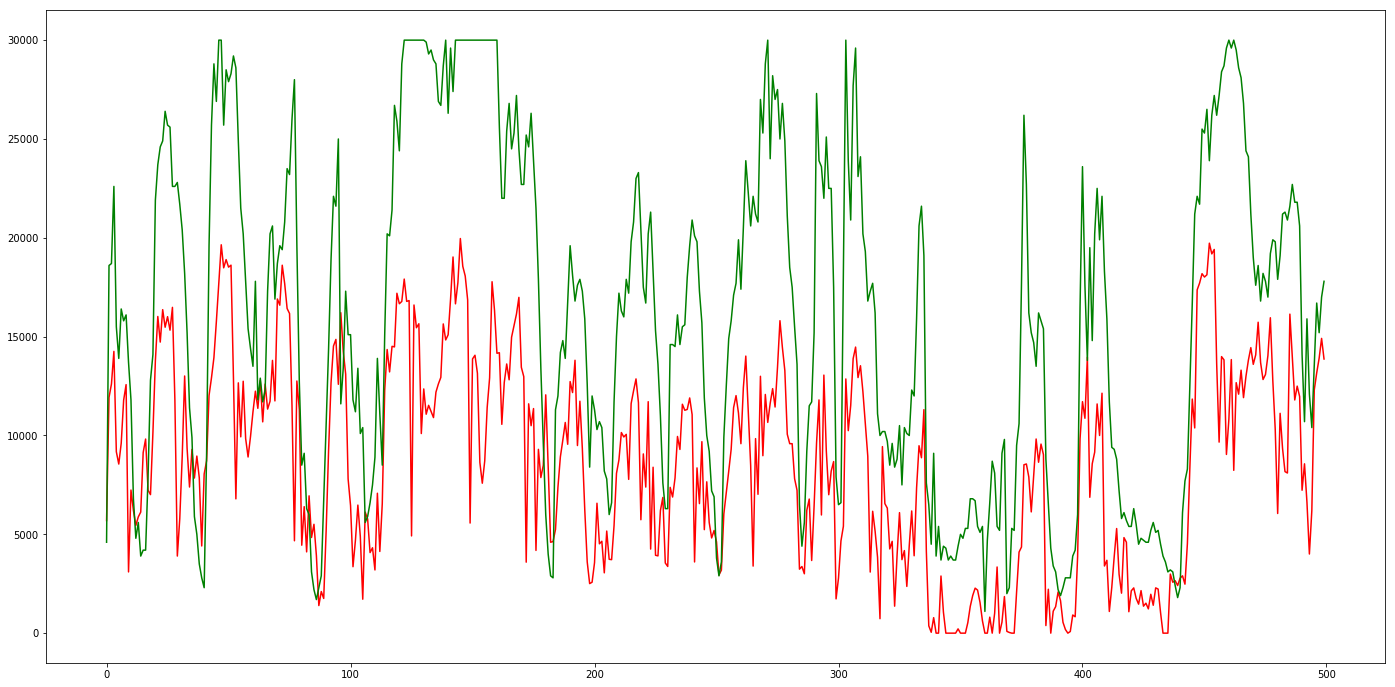

In [10]:
plt.figure(figsize=(24, 12))
plt.plot([i for i in range(500)],pred,c='r')
plt.plot([i for i in range(500)],labelvis_test,c='g')
plt.show()

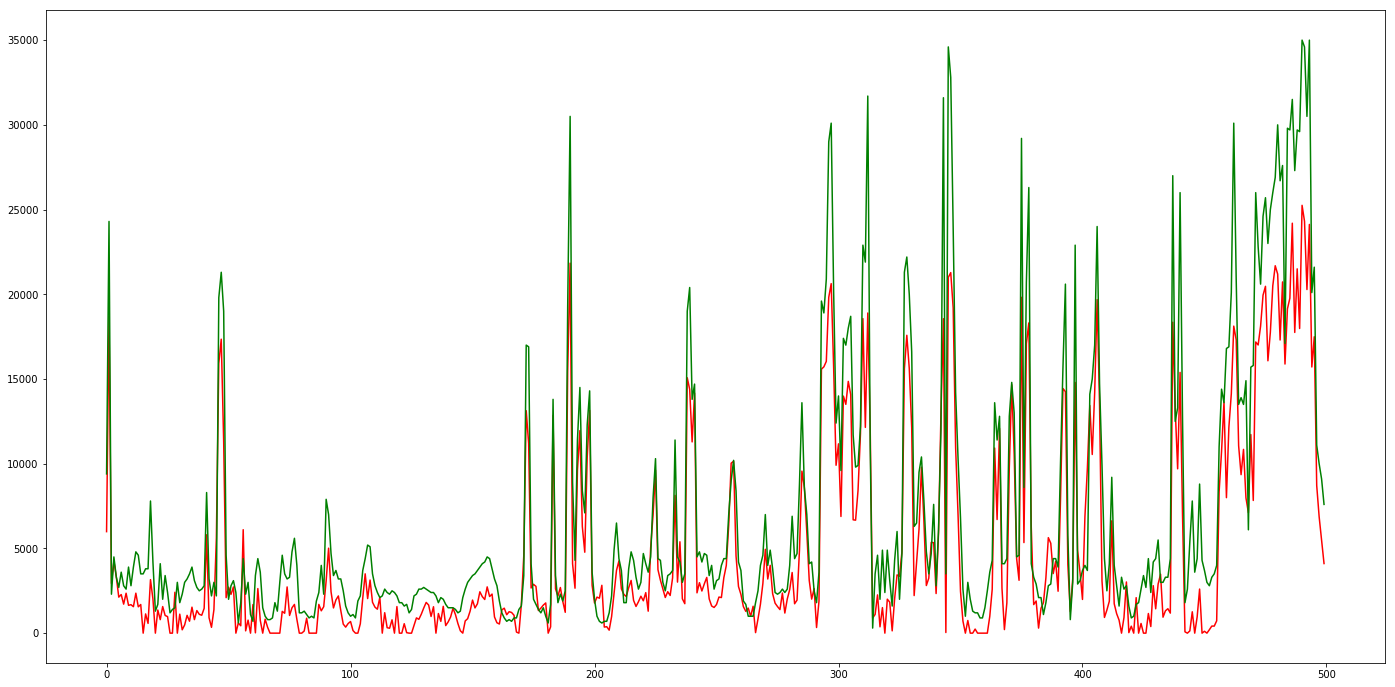

In [18]:
plt.figure(figsize=(24, 12))
plt.plot([i for i in range(500)],pred_train[:500],c='r')
plt.plot([i for i in range(500)],labelvis_train_del[:500],c='g')
plt.show()

In [6]:
H_aug_reg=inception_resnet_v2_model.fit(imgvis_train,labelvis_train,batch_size=15,epochs=20,verbose=1,validation_split=0.2)
inception_resnet_v2_model.save('Vis_inception_resv2_aug_reg.h5')

Train on 22214 samples, validate on 5554 samples
Epoch 1/20
22214/22214 [==============================] - 1036s 47ms/step - loss: 274885451.8367 - mean_absolute_error: 13596.1236 - val_loss: 269581533.5727 - val_mean_absolute_error: 13354.9070
Epoch 2/20
22214/22214 [==============================] - 1017s 46ms/step - loss: 261508128.6830 - mean_absolute_error: 13289.3685 - val_loss: 254335560.8674 - val_mean_absolute_error: 12873.0132
Epoch 3/20
22214/22214 [==============================] - 1016s 46ms/step - loss: 243671881.5190 - mean_absolute_error: 12865.2867 - val_loss: 217326554.8254 - val_mean_absolute_error: 11477.0118
Epoch 4/20
22214/22214 [==============================] - 1017s 46ms/step - loss: 222804887.5781 - mean_absolute_error: 12337.8673 - val_loss: 232336740.9340 - val_mean_absolute_error: 12514.7342
Epoch 5/20
22214/22214 [==============================] - 1017s 46ms/step - loss: 200090606.5328 - mean_absolute_error: 11718.4292 - val_loss: 176116684.4432 - val_mea

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:121: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [11]:
from keras.models import load_model
import numpy as np
import pandas as pd 
import tensorflow as tf 
from keras import layers
import keras

import cv2 as cv 
import matplotlib.pyplot as plt
import os
import datetime
H=load_model('Vis_inception_resv2_aug_reg.h5')
plt.style.use("ggplot")
plt.figure()
N = 20
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["mean_absolute_error"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_mean_absolute_error"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.show()

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


AttributeError: 'Model' object has no attribute 'history'

In [10]:
inception_resnet_v2_model.s

<bound method Container.summary of <keras.engine.training.Model object at 0x0000012482557860>>

# -----------------------------Load Data----------------------------------

In [7]:
#inception_resnet_v2_model=load_model('Vis_inception_resv2_aug_reg.h5')
labelvis_train=np.load("visual_data/labelvis_train.npz")["arr_0"]
imgvis_train=np.load("visual_data/imgvis_train.npz")["arr_0"]
imgvis_train.shape

(27768,)

In [8]:
imgvis_train.shape

(27768, 295, 584, 3)

In [9]:
pred=inception_resnet_v2_model.predict(imgvis_test,verbose=1)

500/500 [==============================] - 9s 19ms/step


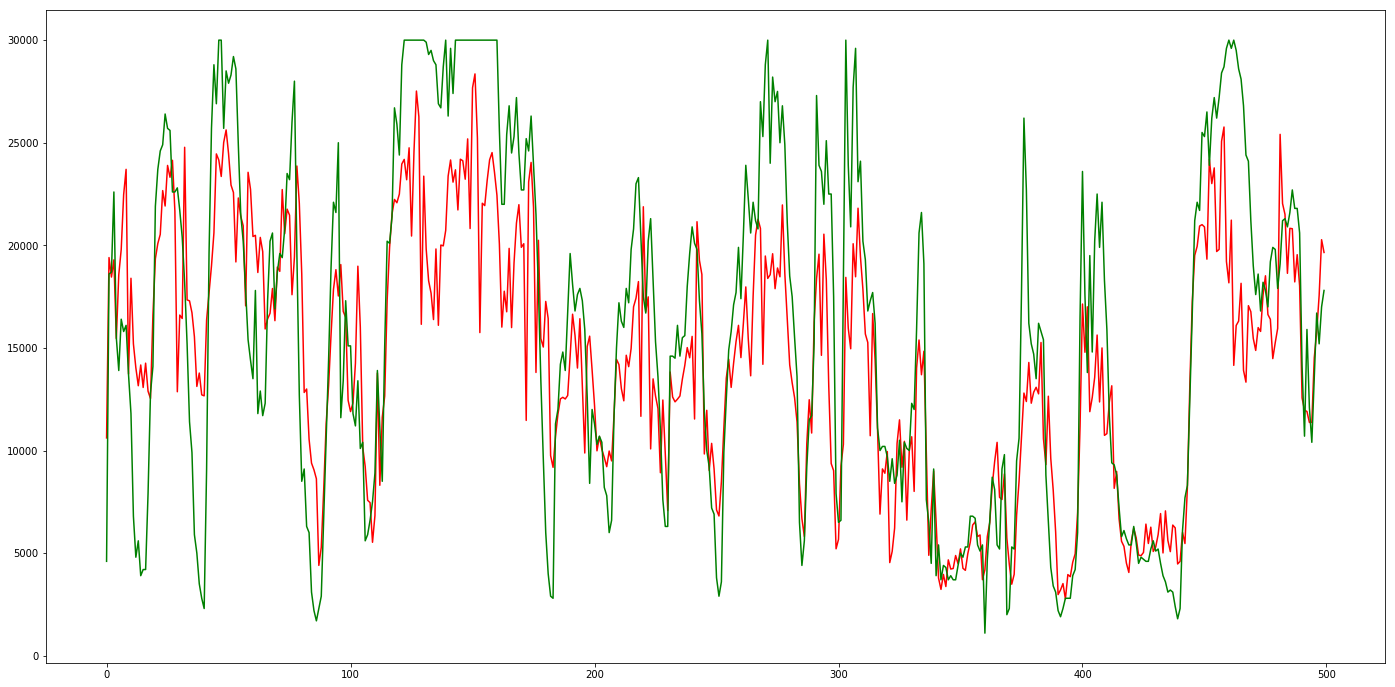

In [10]:
plt.figure(figsize=(24, 12))
plt.plot([i for i in range(500)],pred,c='r')
plt.plot([i for i in range(500)],labelvis_test,c='g')
plt.show()

In [11]:
np.mean(np.abs(pred.squeeze()-labelvis_test.squeeze()))

3927.8618046875

In [2]:
from keras.models import load_model
model = load_model('Vis_resnet_aug_del_class_10_19.h5')
import numpy as np
img_vis=np.load("visual_data/img_vis.npz")["arr_0"]
label_vis=np.load("visual_data/label_vis.npz")["arr_0"]
#pred = model.predict(img_vis,verbose=1)

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\topology.py:1253: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)
C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
img_vis.shape

(7442, 295, 584, 3)

In [4]:
pred = model.predict(img_vis,verbose=1)

7442/7442 [==============================] - 120s 16ms/step


In [48]:
date_vis=np.load("visual_data/date_vis.npz")["arr_0"]

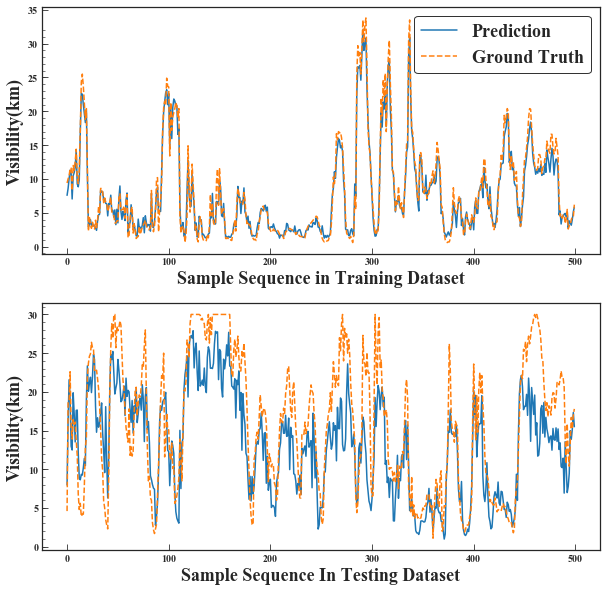

In [47]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.style.use("seaborn-ticks")
fig = plt.figure(figsize=(10, 10))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot([i for i in range(500)],pred[0:500]/1000,linestyle='-',label="Prediction")
ax1.plot([i for i in range(500)],label_vis[0:500]/1000,linestyle='--',label="Ground Truth")

ax2.plot([i for i in range(500)],pred[-500:]/1000,linestyle='-',label="Prediction")
ax2.plot([i for i in range(500)],label_vis[-500:]/1000,linestyle='--',label="Ground Truth")


# 设置横纵坐标的名称以及对应字体格式
font1 = {'family': 'Times New Roman',
         'weight': 'light',
         'size': 18,
         }
font2 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 18,
         }

#设置主刻度标签的位置,标签文本的格式
ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)
ax1.yaxis.set_minor_locator(yminorLocator)
ax1.set_xlabel("Sample Sequence in Training Dataset",font2)
ax1.set_ylabel("Visibility(km)",font2)

#修改主刻度
ymajorLocator = MultipleLocator(5) #将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%i') #设置y轴标签文本的格式
yminorLocator = MultipleLocator(1)
#设置主刻度标签的位置,标签文本的格式
ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)
ax1.yaxis.set_minor_locator(yminorLocator)
#设置主刻度标签的位置,标签文本的格式
ax2.yaxis.set_major_locator(ymajorLocator)
ax2.yaxis.set_major_formatter(ymajorFormatter)
ax2.yaxis.set_minor_locator(yminorLocator)
ax2.set_xlabel("Sample Sequence In Testing Dataset",font2)
ax2.set_ylabel("Visibility(km)",font2)


#plt.tick_params(labelsize=16)
labels = ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()
# print labels
[label.set_fontname('Times New Roman') for label in labels]

# 设置xtick和ytick的方向：in、out、inout
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.tick_params()

#ax1.legend(loc='upper right',fontsize = 20,frameon=True,edgecolor='Black',prop=font1)
#{"weight":'bold','family':'Times New Roman'}

#ax2 = ax1.twinx()
#ax2.plot(np.arange(0, N), H.history["loss"][:100], label="train_loss")
#ax2.plot(np.arange(0, N), H.history['val_loss'][:100], label="validation_loss")

plt.tick_params()

ax1.legend(loc='best',fontsize = 20,frameon=True,edgecolor='Black',prop=font1)
#{"weight":'bold','family':'Times New Roman'}

plt.show()

In [49]:
date_vis

array(['2018/05/17 00:00', '2018/05/17 01:00', '2018/05/17 02:00', ...,
       '2019/05/22 12:00', '2019/05/22 13:00', '2019/05/22 14:00'],
      dtype='<U16')

In [51]:
time=[]
for i in range(0,date_vis.size):
    time.append(date_vis[i][11:])

In [73]:
time

['00:00',
 '01:00',
 '02:00',
 '03:00',
 '04:00',
 '05:00',
 '06:00',
 '07:00',
 '08:00',
 '09:00',
 '10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '18:00',
 '19:00',
 '20:00',
 '21:00',
 '22:00',
 '23:00',
 '00:00',
 '01:00',
 '02:00',
 '03:00',
 '04:00',
 '05:00',
 '06:00',
 '07:00',
 '08:00',
 '09:00',
 '10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '18:00',
 '19:00',
 '20:00',
 '21:00',
 '22:00',
 '23:00',
 '00:00',
 '01:00',
 '02:00',
 '03:00',
 '04:00',
 '05:00',
 '06:00',
 '07:00',
 '08:00',
 '09:00',
 '10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '18:00',
 '19:00',
 '20:00',
 '21:00',
 '22:00',
 '23:00',
 '00:00',
 '01:00',
 '02:00',
 '03:00',
 '04:00',
 '05:00',
 '06:00',
 '07:00',
 '08:00',
 '09:00',
 '10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '18:00',
 '19:00',
 '20:00',
 '21:00',
 '10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',


In [93]:
time = np.array(time)
t = np.where((time == '00:00')|(time == '01:00')|(time == '02:00')|(time == '03:00')|(time == '04:00')
             |(time == '05:00')|(time == '06:00')|(time == '23:00')|(time == '22:00')|(time == '21:00')
             |(time == '20:00')|(time == '19:00'),'Night','Daytime')

In [80]:
t

array([0, 0, 0, ..., 1, 1, 1])

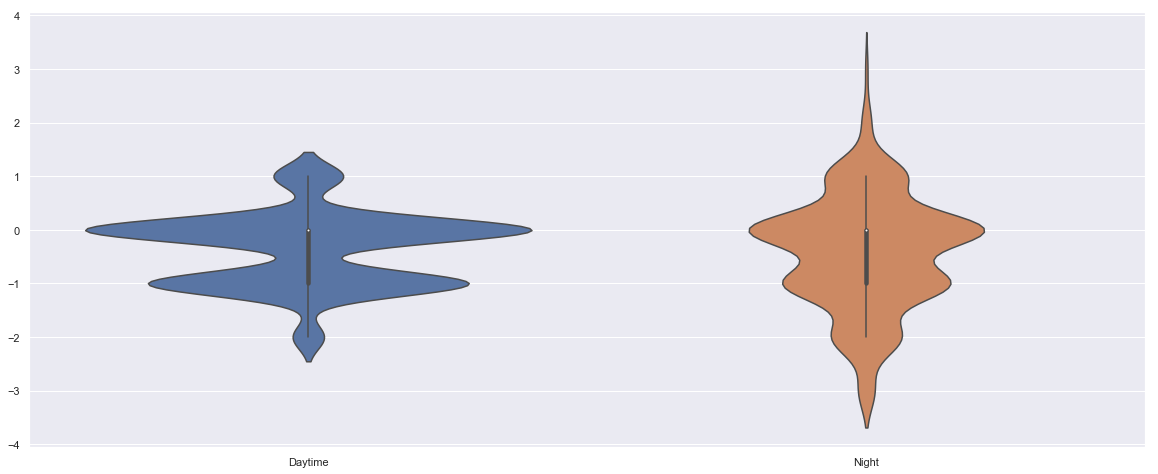

In [149]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
#sns.set_context('talk')
plt.style.use({'figure.figsize':(20, 8)})
sns.violinplot(x=t[-500:],y=cnn_pred_class_abs[-500:])

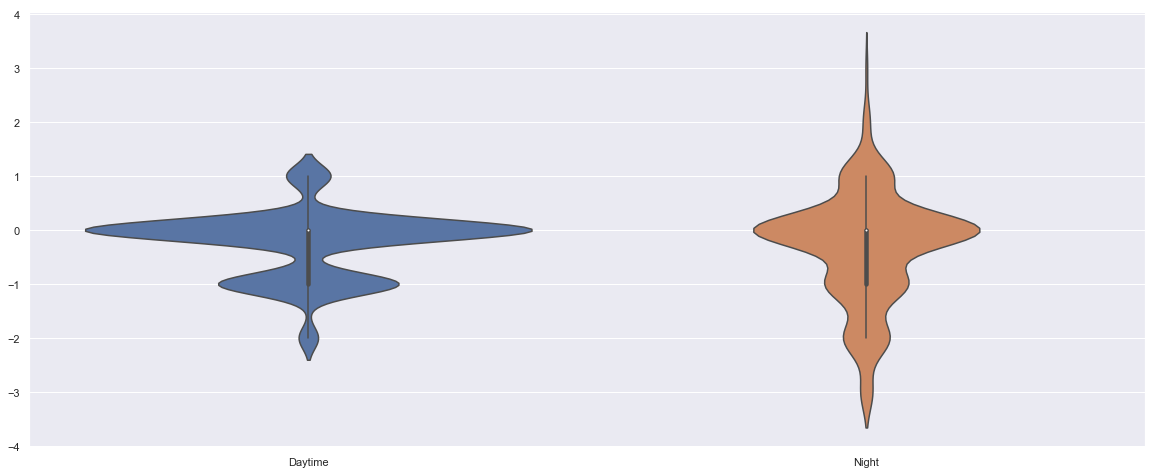

In [166]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
#sns.set_context('talk')
plt.style.use({'figure.figsize':(20, 8)})
sns.violinplot(x=t[-500:],y=lstm_pred_class_abs[-500:])

In [104]:
cnn_pred_abs = np.array(np.squeeze(pred) - label_vis)

In [122]:
cnn_label_class = np.zeros(np.array(label_vis.shape))
cnn_label_class = np.where(label_vis>20000,4,cnn_label_class)
cnn_label_class = np.where((label_vis>15000)&(label_vis<=20000),3,cnn_label_class)
cnn_label_class = np.where((label_vis>10000)&(label_vis<=15000),2,cnn_label_class)
cnn_label_class = np.where((label_vis>5000)&(label_vis<=10000),1,cnn_label_class)
cnn_label_class = np.where((label_vis<=5000),0,cnn_label_class)



In [154]:
pred = np.squeeze(pred)
cnn_pred_class = np.zeros(np.array(label_vis.shape))
cnn_pred_class = np.where(pred>20000,4,cnn_pred_class)
cnn_pred_class = np.where((pred>15000)&(pred<=20000),3,cnn_pred_class)
cnn_pred_class = np.where((pred>10000)&(pred<=15000),2,cnn_pred_class)
cnn_pred_class = np.where((pred>5000)&(pred<=10000),1,cnn_pred_class)
cnn_pred_class = np.where((pred<=5000),0,cnn_pred_class)

In [147]:
cnn_pred_class_abs = np.array(cnn_pred_class - cnn_label_class)

In [159]:
cnn_label_class[-500:]

array([0., 3., 3., 4., 3., 2., 3., 3., 3., 2., 2., 1., 0., 1., 0., 0., 0.,
       1., 2., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 3.,
       2., 1., 1., 0., 0., 0., 0., 1., 3., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 3., 3., 2., 2., 3., 2., 2., 2., 2., 3., 4.,
       4., 3., 3., 3., 3., 4., 4., 4., 4., 4., 3., 2., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 2., 2., 3., 4., 4., 4., 2., 2., 3., 3., 3., 2.,
       2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 2., 1., 1., 0., 0., 0., 2., 2., 2.,
       2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 2., 1., 2., 2., 2., 2., 2.,
       1., 1., 1., 1., 2., 2., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 3.,
       3., 4., 4., 3., 3.

In [146]:
cnn_pred_class[-500:]

array([1., 3., 4., 3., 2., 2., 3., 3., 2., 3., 3., 2., 1., 1., 1., 1., 2.,
       2., 2., 3., 4., 4., 4., 4., 3., 4., 4., 4., 3., 2., 3., 3., 3., 3.,
       3., 2., 2., 1., 3., 2., 1., 2., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 3., 3., 3., 4., 3., 4., 3., 4., 4., 3., 3., 3., 2., 3., 3.,
       4., 3., 3., 3., 3., 3., 4., 3., 2., 3., 4., 3., 3., 2., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 1.,
       2., 2., 2., 2., 1., 0., 0., 0., 0., 3., 1., 2., 2., 4., 4., 4., 4.,
       3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       3., 3., 2., 3., 3., 3., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 3., 3., 3., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 2., 2., 3., 3., 2., 2., 3., 2., 2., 3., 1., 3.,
       2., 2., 1., 1., 1.

In [141]:
cnn_pred_class.shape

(7442, 7442)

In [164]:
lstm_pred_class = [1., 3., 4., 3., 2., 2., 3., 3., 2., 3., 3., 2., 1., 1., 1., 1., 2.,
       2., 2., 3., 4., 4., 4., 4., 3., 4., 4., 4., 3., 2., 3., 3., 3., 3.,
       3., 2., 2., 1., 3., 2., 1., 2., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 3., 3., 3., 4., 3., 4., 3., 4., 4., 3., 3., 3., 2., 3., 3.,
       4., 3., 3., 3., 3., 3., 4., 3., 2., 3., 4., 3., 3., 2., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 1.,
       2., 2., 2., 2., 1.,1., 1., 1., 1., 2., 2., 1., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       3., 3., 2., 3., 3., 3., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 3., 3., 3., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 2., 2., 3., 3., 2., 2., 3., 2., 2., 3., 1., 3.,
       2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 3., 2., 1., 2., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       2., 2., 2., 3., 2., 2., 2., 3., 3., 3., 2., 3., 3., 3., 3., 3., 2.,
       2., 2., 2., 3., 4., 3., 3., 3., 2., 2., 2., 2., 1., 1., 1., 2., 2.,
       2., 2., 3., 3., 2., 2., 1., 1., 1., 1., 1., 1., 1., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 3., 3., 3., 3., 2., 1., 2., 2., 1., 1., 1.,
       1., 1., 2., 1., 2., 2., 1., 2., 2., 3., 4., 4., 3., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       2., 3., 4., 4., 3., 3., 2., 2., 3., 3., 3., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 3., 4., 3., 2., 3., 2., 4., 4., 3.,
       4., 3., 3., 2., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 2., 3., 4., 4., 4., 3., 3., 3., 3., 3., 4., 3., 2., 4., 3.,
       3., 3., 2., 3., 2., 2., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 2.,
       2., 2., 3., 2., 2., 3., 2., 3., 2., 2., 2., 2., 2., 1., 2., 2., 1.,
       1., 1., 2., 2., 3., 3., 3.]

In [165]:
lstm_pred_class_abs = np.array(lstm_pred_class - cnn_label_class[-500:])

In [163]:
LSTM_abs = {4:2,3:4,2:15,1:47,0:38+61+56+83+153,-1:19+4+2+3,-2:13,-3:0,-4:0}

In [ ]:
CNN_abs = {4:0,3:1,2:12,1:23+10+13+12,0:34+48+30+54}

In [327]:
b=[1., 4., 4., 5., 4., 3., 4., 4., 4., 3., 3., 2., 1., 2., 1., 1., 1., 2., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 3., 2., 2., 2., 1., 1., 1., 2., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 3., 3., 4., 3., 3., 3., 3., 4., 5., 5., 4., 4., 4., 4., 5., 5., 5., 5., 5., 4., 3., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 3., 3., 4., 5., 5., 5., 3., 3., 4., 4., 4., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 3., 3., 2., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 3., 2., 2., 1., 1., 1., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 3., 2., 3., 3., 3., 3., 3., 2., 2., 2., 2., 3., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 4., 4., 5., 5., 4., 4., 3., 3., 2., 2., 2., 3., 3., 3., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 3., 3., 2., 2., 2., 1., 1., 1., 2., 3., 3., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 3., 2., 1., 2., 2., 3., 3., 4., 5., 5., 5., 5., 5., 5., 5., 4., 2., 2., 2., 4., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 3., 3., 3., 3., 2., 2., 2., 2., 2., 3., 2., 3., 3., 3., 3., 3., 4., 5., 5., 4., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 3., 4., 5., 5., 4., 4., 3., 3., 4., 4., 4., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 4., 5., 4., 3., 4., 3., 5., 5., 4., 5., 4., 4., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 3., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 3., 3., 4., 3., 3., 3., 4., 4., 4., 4.]
c=[1., 4., 4., 5., 4., 3., 4., 4., 4., 2., 2., 3., 1., 2., 1., 1., 1., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 1., 2., 2., 1., 2., 1., 2., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 3., 3., 4., 3., 3., 3., 3., 4., 5., 5., 4., 4., 4., 2., 5., 5., 5., 5., 5., 3., 4., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 3., 3., 4., 4., 4,5., 5., 3., 3., 4., 4., 4., 3., 3., 3., 3., 3., 2., 3., 2., 2., 2., 3., 4., 2., 4., 5., 5., 3., 5., 5., 4., 4., 5., 5., 5., 5., 5., 5., 3., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 3., 5., 5., 5., 3., 5., 5., 5., 2., 5., 5., 5., 5., 5., 5., 5., 3., 4., 5., 5., 4, 5., 5., 5.,2., 5., 5., 5., 3., 4., 3., 2., 2., 1., 1., 1., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 1., 2., 3., 3., 3., 3., 1., 2., 2., 2., 2., 4., 3., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 4., 4., 5., 5., 4., 2., 3., 3., 1., 1., 2., 3., 4., 3., 3., 3., 4., 4., 2., 4., 5., 5., 4., 4., 4., 3., 3., 1., 2., 2., 1., 1., 1., 2., 3., 3.,2., 2., 2., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 3., 2., 3., 3., 1., 3., 3., 4., 5., 4., 5., 5., 5., 5., 5., 4., 2., 2., 2., 4., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 3., 3., 3., 3., 2., 2., 2., 2., 2., 3., 2., 3., 3., 3., 3., 3., 4., 5., 5., 4., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 3., 2., 2., 2., 1., 1., 2., 2., 2., 3., 4., 5.,3., 2., 2., 3., 3., 4., 4., 4., 2., 2., 2., 3., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 4., 5., 4., 3., 4., 2., 4., 5., 4., 4., 4., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 3., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 3., 3., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 3., 4., 3., 2., 3., 4., 4., 4., 4.]
d=[1., 4., 4., 5., 4., 3., 4., 4., 4., 2., 2., 2., 2., 2., 1., 1., 1., 2., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 3., 2., 2., 2., 1., 1., 1., 2., 4., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 3., 3., 4., 3., 3., 3., 2., 3., 4., 4., 4., 4., 3., 3., 4., 5., 5., 5., 5., 4., 3., 2., 2., 2., 2., 3., 3., 2., 2., 1., 3., 2., 4., 4., 5., 5., 5., 3., 3., 4., 3., 4., 3., 3., 3., 2., 2., 3., 2., 4., 2., 2., 2., 2., 2., 4., 5., 5., 5., 5., 3., 5., 5., 5., 5., 4., 5., 4., 5., 5., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 4., 3., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 3., 4., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 2., 3., 1., 2., 2., 1., 3., 3., 1., 4., 3., 3., 4., 3., 4., 5., 4., 4., 4., 4., 3., 2., 3., 3., 3., 3., 3., 2., 4., 2., 2., 3., 4., 4., 5., 5., 5., 4., 4., 5., 5., 5., 3., 2., 4., 5., 5., 4., 4., 2., 3., 2., 3., 2., 3., 3., 3., 4., 3., 5., 5., 3., 4., 5., 5., 4., 3., 4., 3., 3., 2., 2., 3., 1., 1., 1., 2., 3., 3., 5., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 3., 5., 5., 4., 3., 2., 1., 2., 3., 4., 3., 5., 5., 5., 5., 5., 5., 5., 5., 4., 1., 2., 3., 4., 4., 2., 2., 3., 4., 5., 4., 5., 5., 4., 4., 4., 4., 3., 3., 3., 4., 4., 2., 2., 3., 3., 3., 2., 3., 3., 3., 3., 3., 4., 5., 5., 4., 2., 3., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 4., 2., 3., 1., 2., 3., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 3., 3., 5., 5., 4., 4., 3., 2., 5., 2., 5., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 4., 5., 4., 2., 4., 3., 5., 5., 3., 5., 4., 4., 3., 2., 2., 1., 3., 3., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 3., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 3., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 3., 3., 4., 3., 3., 3., 4., 4., 4., 4. ]

In [394]:
c_1=np.array(c)
c_1[5:17]=5
c_1[29:41]=1
c_1[53:65]=5
c_1[77:89]=1
c_1[101:113]=1
c_1[125:137]=1
d_1 = np.array(d)
d_1[5:16]=5
d_1[29:41]=1
d_1[101:113]=1
#d_1[52:64]=5
#d_1[52:64]=1

In [393]:
t2[125:137]

array(['Night', 'Night', 'Night', 'Night', 'Night', 'Night', 'Night',
       'Night', 'Night', 'Night', 'Night', 'Night'], dtype='<U7')

In [3]:
import numpy as np

In [4]:
cnn_pred_class_abs=np.array(c_1)-np.array(b)
lstm_pred_class_abs=np.array(d_1)-np.array(b)
stack = np.hstack((cnn_pred_class_abs,lstm_pred_class_abs))
t2 = np.hstack((t[-500:],t[-500:]))
is_lstm = np.zeros(stack.shape)
is_lstm[-500:] = 1
#is_lstm = np.where(is_lstm==0,"ResNet","ResNet")
is_lstm= is_lstm.astype('str')
for i in range(0,len(is_lstm)):
    if i<500:
        is_lstm[i] = "ResNet"
    else:
        is_lstm[i] = "ResNet+LSTM"
df_empty = pd.DataFrame(columns=["Difference",'Resnet/LSTM','Time'])
df_empty["Difference"]=stack
df_empty['Resnet/LSTM']=is_lstm
df_empty["Time"]=t2   

NameError: name 'c_1' is not defined

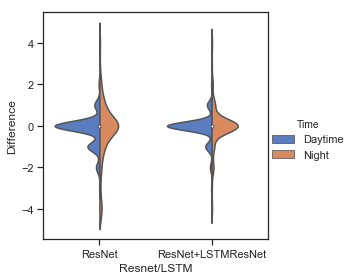

In [396]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rc(font2)
sns.set_style('ticks')
g = sns.catplot(x='Resnet/LSTM', y="Difference",
                 hue="Time", 
                 data=df_empty, kind="violin", split=True,
                height=4, aspect=1,palette="muted");
g.despine(left=False,right=False,top=False)

In [173]:
tips
g = sns.catplot(x="sex", y="total_bill",
...                 hue="smoker", col="time",
...                 data=tips, kind="violin", split=True,
...                 height=4, aspect=.7);

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
